'''

@Author: Jayesh Patil 

@Date: 11-11-24 

@Title: Simple Linear Regression 

'''

Problem :- Build a predictive linear regression model for given dataset, train the model for
training set and test it against test dataset, plot the model using any plotting
library

Importing libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [6]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

Analysing Dataset

In [7]:
print("train_data:",train.describe())
print("test_data:",test.describe())

train_data:                  x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618
test_data:                 x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


In [8]:
print("Shape :" ,test.shape)
print(test)
print("Shape :" ,train.shape)
print(train)

Shape : (300, 2)
      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]
Shape : (700, 2)
        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


Handling null values

In [9]:
missing_values = train.isna().sum()
print(missing_values)

x    0
y    1
dtype: int64


In [10]:
train.dropna(inplace= True)

In [11]:
train.isna().sum()

x    0
y    0
dtype: int64

In [12]:
train.shape

(699, 2)

Visualizing Dataset

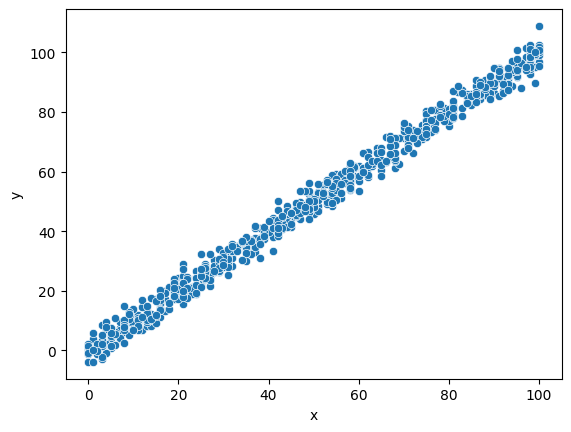

In [25]:
sns.scatterplot(x=train['x'], y=train['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Check outliers

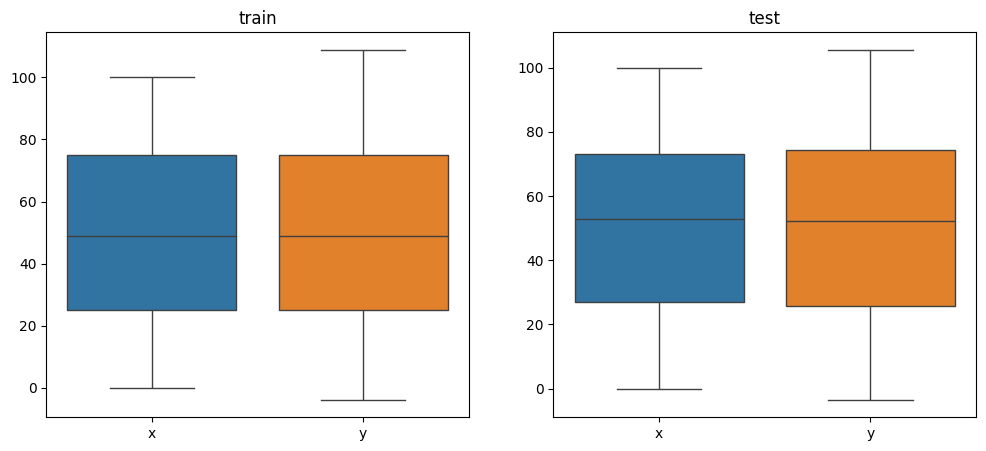

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=train)
plt.title('train')

plt.subplot(1, 2, 2)
sns.boxplot(data=test)
plt.title('test')
plt.show()

Spliting Dataset

In [31]:
x_train = train[['x']]
y_train = train['y']
x_test = test[['x']]
y_test = test['y']

Scaling Data Set

In [39]:
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train)
print("scaled x_train : ",x_train_scaled[0:5])

x_test_scaled = scalar.fit_transform(x_test)
print("scaled X_test : ",x_test_scaled[0:5])



scaled x_train :  [[-8.99096176e-01]
 [-4.94443564e-04]
 [-1.21015062e+00]
 [-4.15233705e-01]
 [ 1.27828495e+00]]
scaled X_test :  [[ 0.91589319]
 [-1.05200623]
 [-1.01686517]
 [-1.08714729]
 [-0.52489032]]


Model Selection

In [44]:
model = LinearRegression()

model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
y_pred.shape

(300,)

Model Performance

In [48]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 10.772744770430302
R-squared Score: 0.9872108368470156


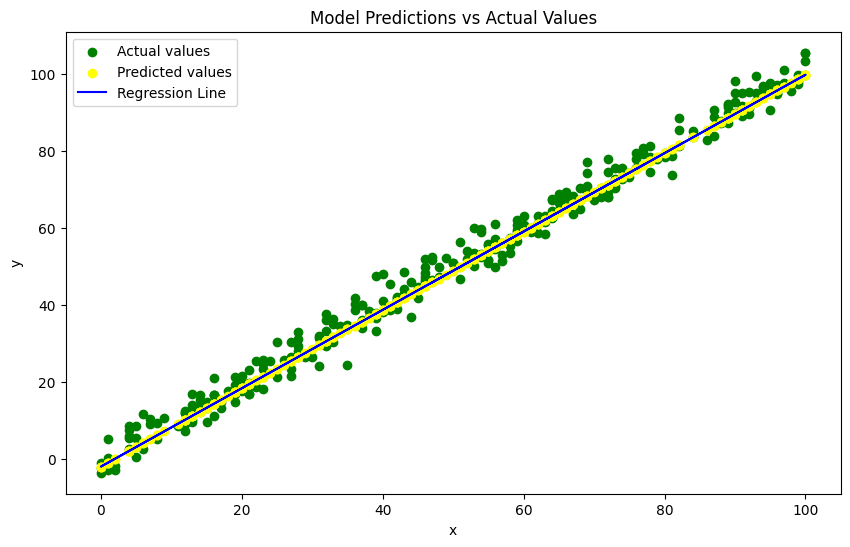

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='green', label='Actual values')
plt.scatter(x_test, y_pred, color='yellow', label='Predicted values')
plt.plot(x_test, y_pred, color='blue', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()